# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Sandy Tirta Yudha]
- **Email:** [sandyytirtaa@gmail.com]
- **ID Dicoding:** [sandyytirtaa]

## Menentukan Pertanyaan Bisnis

- Seberapa besar dampak kondisi cuaca terhadap jumlah peminjaman sepeda pada akhir pekan dalam dua tahun terakhir?
- Bagaimana pola pertumbuhan jumlah peminjaman sepeda pada musim panas dibandingkan dengan musim lainnya?
-Bagaimana perbedaan pola peminjaman sepeda antara pengguna casual dan registered pada hari kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from google.colab import files

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/sendy-ty/proyekakhir/refs/heads/main/Data/day.csv")
day_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/sendy-ty/proyekakhir/refs/heads/main/Data/hour.csv")
hour_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

**Insight :**

- Dataset **day.csv** mencatat jumlah peminjaman sepeda secara harian, dengan informasi terkait musim (season), hari kerja (workingday), kondisi cuaca (weathersit), suhu (temp), dan jumlah pengguna baik casual maupun registered. Hal ini memungkinkan analisis tren peminjaman sepeda dari waktu ke waktu, termasuk pola berdasarkan musim dan cuaca.

- Dataset **hour.csv** mencatat data peminjaman sepeda secara per jam, yang mencakup informasi serupa dengan day.csv, tetapi dengan tambahan kolom hr (jam). Dataset ini dapat digunakan untuk memahami pola penggunaan sepeda dalam satu hari, seperti jam sibuk peminjaman atau perbedaan antara pagi dan malam.

### Assessing Data

Menilai tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

Menilai tabel hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [10]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight**:
- Dataset day.csv dan hour.csv telah diperiksa untuk menemukan missing values, inkonsistensi data, dan outlier.
- Tidak ditemukan missing values, namun terdapat beberapa nilai ekstrem dalam variabel seperti suhu (temp) dan kecepatan angin (windspeed).

### Cleaning Data

Membersihkan tabel day_df

In [12]:
day_df.drop(labels='instant', axis=1, inplace=True)
hour_df.drop(labels='instant', axis=1, inplace=True)

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [14]:
day_df.duplicated().sum()

0

Merubah tipe data

In [15]:
# Mengubah nama beberapa kolom dalam DataFrame day_df & hour_df
day_df.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "hum": "humidity",
        "cnt": "count",
    },
    inplace=True,
)
hour_df.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "hr": "hour",
        "hum": "humidity",
        "cnt": "count",
    },
    inplace=True,
)

hour_df.head()

dateday  season  year  month  hour  holiday  weekday  workingday  \
0  2011-01-01       1     0      1     0        0        6           0   
1  2011-01-01       1     0      1     1        0        6           0   
2  2011-01-01       1     0      1     2        0        6           0   
3  2011-01-01       1     0      1     3        0        6           0   
4  2011-01-01       1     0      1     4        0        6           0   

   weathersit  temp   atemp  humidity  windspeed  casual  registered  count  
0           1  0.24  0.2879      0.81        0.0       3          13     16  
1           1  0.22  0.2727      0.80        0.0       8          32     40  
2           1  0.22  0.2727      0.80        0.0       5          27     32  
3           1  0.24  0.2879      0.75        0.0       3          10     13  
4           1  0.24  0.2879      0.75        0.0       0           1      1

In [16]:
day_df["dateday"] = pd.to_datetime(day_df["dateday"])
hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])
day_df["year"] = day_df["dateday"].dt.year
hour_df["year"] = hour_df["dateday"].dt.year
day_df["month"] = day_df["dateday"].dt.strftime("%B")
hour_df["month"] = hour_df["dateday"].dt.strftime("%B")
weather_mapping = {
    1: "cerah/berawan",
    2: "berawan dan berkabut",
    3: "hujan/salju ringan",
    4: "hujan/salju lebat",
}
day_df["weathersit"] = day_df["weathersit"].replace(weather_mapping)
hour_df["weathersit"] = hour_df["weathersit"].replace(weather_mapping)

hour_df.head()

dateday  season  year    month  hour  holiday  weekday  workingday  \
0 2011-01-01       1  2011  January     0        0        6           0   
1 2011-01-01       1  2011  January     1        0        6           0   
2 2011-01-01       1  2011  January     2        0        6           0   
3 2011-01-01       1  2011  January     3        0        6           0   
4 2011-01-01       1  2011  January     4        0        6           0   

      weathersit  temp   atemp  humidity  windspeed  casual  registered  count  
0  cerah/berawan  0.24  0.2879      0.81        0.0       3          13     16  
1  cerah/berawan  0.22  0.2727      0.80        0.0       8          32     40  
2  cerah/berawan  0.22  0.2727      0.80        0.0       5          27     32  
3  cerah/berawan  0.24  0.2879      0.75        0.0       3          10     13  
4  cerah/berawan  0.24  0.2879      0.75        0.0       0           1      1

In [17]:
all_df = hour_df.merge(
    day_df, on="dateday", how="inner", suffixes=("_hour", "_day")
)
all_df.head()

dateday  season_hour  year_hour month_hour  hour  holiday_hour  \
0 2011-01-01            1       2011    January     0             0   
1 2011-01-01            1       2011    January     1             0   
2 2011-01-01            1       2011    January     2             0   
3 2011-01-01            1       2011    January     3             0   
4 2011-01-01            1       2011    January     4             0   

   weekday_hour  workingday_hour weathersit_hour  temp_hour  ...  weekday_day  \
0             6                0   cerah/berawan       0.24  ...            6   
1             6                0   cerah/berawan       0.22  ...            6   
2             6                0   cerah/berawan       0.22  ...            6   
3             6                0   cerah/berawan       0.24  ...            6   
4             6                0   cerah/berawan       0.24  ...            6   

   workingday_day        weathersit_day  temp_day  atemp_day  humidity_day  \
0               0  berawan dan berkabut  0.344167   0.363625      0.805833   
1               0  berawan dan berkabut  0.344167   0.363625      0.805833   
2               0  berawan dan berkabut  0.344167   0.363625      0.805833   
3               0  berawan dan berkabut  0.344167   0.363625      0.805833   
4               0  berawan dan berkabut  0.344167   0.363625      0.805833   

   windspeed_day  casual_day registered_day  count_day  
0       0.160446         331            654        985  
1       0.160446         331            654        985  
2       0.160446         331            654        985  
3       0.160446         331            654        985  
4       0.160446         331            654        985  

[5 rows x 30 columns]

In [18]:
day_df.drop_duplicates(inplace=True)

In [19]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Missing Value

In [20]:
day_df.isna().sum()

dateday       0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [21]:
day_df.season.value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [22]:
day_df.fillna(value="Prefer not to say", inplace=True)

In [23]:
day_df.fillna(1, inplace=True)

In [24]:
day_df.isna().sum()

dateday       0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Inaccurate value

In [25]:
day_df.describe()

dateday      season         year     holiday     weekday  \
count                  731  731.000000   731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00    2.496580  2011.500684    0.028728    2.997264   
min    2011-01-01 00:00:00    1.000000  2011.000000    0.000000    0.000000   
25%    2011-07-02 12:00:00    2.000000  2011.000000    0.000000    1.000000   
50%    2012-01-01 00:00:00    3.000000  2012.000000    0.000000    3.000000   
75%    2012-07-01 12:00:00    3.000000  2012.000000    0.000000    5.000000   
max    2012-12-31 00:00:00    4.000000  2012.000000    1.000000    6.000000   
std                    NaN    1.110807     0.500342    0.167155    2.004787   

       workingday        temp       atemp    humidity   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    0.495385    0.474354    0.627894    0.190486   
min      0.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    0.861667    0.840896    0.972500    0.507463   
std      0.465233    0.183051    0.162961    0.142429    0.077498   

            casual   registered        count  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000  
std     686.622488  1560.256377  1937.211452

In [26]:
day_df[day_df["count"] == day_df["count"].max()]

dateday  season  year      month  holiday  weekday  workingday  \
623 2012-09-15       3  2012  September        0        6           0   

        weathersit      temp     atemp  humidity  windspeed  casual  \
623  cerah/berawan  0.608333  0.585867  0.501667   0.247521    3160   

     registered  count  
623        5554   8714

In [27]:
day_df["count"].replace(day_df["count"].max(), 70, inplace=True)

<ipython-input-27-a66c269bb9c0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df["count"].replace(day_df["count"].max(), 70, inplace=True)


In [28]:
day_df.describe()

dateday      season         year     holiday     weekday  \
count                  731  731.000000   731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00    2.496580  2011.500684    0.028728    2.997264   
min    2011-01-01 00:00:00    1.000000  2011.000000    0.000000    0.000000   
25%    2011-07-02 12:00:00    2.000000  2011.000000    0.000000    1.000000   
50%    2012-01-01 00:00:00    3.000000  2012.000000    0.000000    3.000000   
75%    2012-07-01 12:00:00    3.000000  2012.000000    0.000000    5.000000   
max    2012-12-31 00:00:00    4.000000  2012.000000    1.000000    6.000000   
std                    NaN    1.110807     0.500342    0.167155    2.004787   

       workingday        temp       atemp    humidity   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    0.495385    0.474354    0.627894    0.190486   
min      0.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    0.861667    0.840896    0.972500    0.507463   
std      0.465233    0.183051    0.162961    0.142429    0.077498   

            casual   registered        count  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4492.523940  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3135.000000  
50%     713.000000  3662.000000  4541.000000  
75%    1096.000000  4776.500000  5929.500000  
max    3410.000000  6946.000000  8555.000000  
std     686.622488  1560.256377  1937.861929

Membersihkan tabel hour_df

In [29]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   year        17379 non-null  int32         
 3   month       17379 non-null  object        
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  object        
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  humidity    17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  count       17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [30]:
hour_df.columns

Index(['dateday', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [31]:
category_columns = ["season", "weather"]

for column in category_columns:
    if column in hour_df.columns:
        hour_df[column] = hour_df[column].astype("category")
    else:
        print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")

hour_df.dtypes

Kolom 'weather' tidak ditemukan dalam DataFrame.


dateday       datetime64[ns]
season              category
year                   int32
month                 object
hour                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit            object
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [32]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   year        731 non-null    int32         
 3   month       731 non-null    object        
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(7), object(2)
memory usa

**Insight**
- Data dengan anomali telah diidentifikasi dan ditangani, seperti penghapusan nilai ekstrim pada windspeed.
- Penyesuaian format data, seperti mengubah kolom tanggal (dteday) ke format datetime, telah dilakukan untuk mempermudah analisis.

## Exploratory Data Analysis (EDA)

### Explore Hour & Day

In [33]:
day_df.sample(5)

dateday  season  year     month  holiday  weekday  workingday  \
482 2012-04-27       2  2012     April        0        5           1   
408 2012-02-13       1  2012  February        0        1           1   
313 2011-11-10       4  2011  November        0        4           1   
491 2012-05-06       2  2012       May        0        0           0   
423 2012-02-28       1  2012  February        0        2           1   

               weathersit      temp     atemp  humidity  windspeed  casual  \
482         cerah/berawan  0.457500  0.452637  0.400833   0.347633    1014   
408         cerah/berawan  0.222500  0.227913  0.411250   0.167283      94   
313  berawan dan berkabut  0.380000  0.373721  0.813333   0.189067     190   
491  berawan dan berkabut  0.562500  0.546737  0.740000   0.149879    2135   
423         cerah/berawan  0.359167  0.353525  0.395833   0.193417     229   

     registered  count  
482        5219   6233  
408        3328   3422  
313        2743   2933  
491        4224   6359  
423        4134   4363

In [34]:
day_df.describe(include="all")

dateday      season         year    month     holiday  \
count                   731  731.000000   731.000000      731  731.000000   
unique                  NaN         NaN          NaN       12         NaN   
top                     NaN         NaN          NaN  January         NaN   
freq                    NaN         NaN          NaN       62         NaN   
mean    2012-01-01 00:00:00    2.496580  2011.500684      NaN    0.028728   
min     2011-01-01 00:00:00    1.000000  2011.000000      NaN    0.000000   
25%     2011-07-02 12:00:00    2.000000  2011.000000      NaN    0.000000   
50%     2012-01-01 00:00:00    3.000000  2012.000000      NaN    0.000000   
75%     2012-07-01 12:00:00    3.000000  2012.000000      NaN    0.000000   
max     2012-12-31 00:00:00    4.000000  2012.000000      NaN    1.000000   
std                     NaN    1.110807     0.500342      NaN    0.167155   

           weekday  workingday     weathersit        temp       atemp  \
count   731.000000  731.000000            731  731.000000  731.000000   
unique         NaN         NaN              3         NaN         NaN   
top            NaN         NaN  cerah/berawan         NaN         NaN   
freq           NaN         NaN            463         NaN         NaN   
mean      2.997264    0.683995            NaN    0.495385    0.474354   
min       0.000000    0.000000            NaN    0.059130    0.079070   
25%       1.000000    0.000000            NaN    0.337083    0.337842   
50%       3.000000    1.000000            NaN    0.498333    0.486733   
75%       5.000000    1.000000            NaN    0.655417    0.608602   
max       6.000000    1.000000            NaN    0.861667    0.840896   
std       2.004787    0.465233            NaN    0.183051    0.162961   

          humidity   windspeed       casual   registered        count  
count   731.000000  731.000000   731.000000   731.000000   731.000000  
unique         NaN         NaN          NaN          NaN          NaN  
top            NaN         NaN          NaN          NaN          NaN  
freq           NaN         NaN          NaN          NaN          NaN  
mean      0.627894    0.190486   848.176471  3656.172367  4492.523940  
min       0.000000    0.022392     2.000000    20.000000    22.000000  
25%       0.520000    0.134950   315.500000  2497.000000  3135.000000  
50%       0.626667    0.180975   713.000000  3662.000000  4541.000000  
75%       0.730209    0.233214  1096.000000  4776.500000  5929.500000  
max       0.972500    0.507463  3410.000000  6946.000000  8555.000000  
std       0.142429    0.077498   686.622488  1560.256377  1937.861929

In [35]:
day_df["dateday"].is_unique

True

In [36]:
day_df[day_df.duplicated(subset=["dateday"], keep=False)]

Empty DataFrame
Columns: [dateday, season, year, month, holiday, weekday, workingday, weathersit, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []

In [37]:
day_df.groupby(by="year").agg({
    "count": ["max", "min", "mean", "std"]
})

count                               
       max  min         mean          std
year                                     
2011  6043  431  3405.761644  1378.753666
2012  8555   22  5576.316940  1804.435229

In [38]:
day_df.groupby(by="month")["dateday"].nunique().sort_values(ascending=False)

month
August       62
December     62
January      62
July         62
March        62
May          62
October      62
April        60
June         60
November     60
September    60
February     57
Name: dateday, dtype: int64

In [39]:
day_df.groupby(by="year")["dateday"].nunique().sort_values(ascending=False)


year
2012    366
2011    365
Name: dateday, dtype: int64

**Explorer hour_df**

In [40]:
hour_df.sample(5)

dateday season  year      month  hour  holiday  weekday  workingday  \
10354 2012-03-12      1  2012      March    13        0        1           1   
5560  2011-08-24      3  2011     August    14        0        3           1   
14846 2012-09-15      3  2012  September    19        0        6           0   
8789  2012-01-07      1  2012    January     1        0        6           0   
12695 2012-06-18      2  2012       June     4        0        1           1   

                 weathersit  temp   atemp  humidity  windspeed  casual  \
10354  berawan dan berkabut  0.54  0.5152      0.32     0.2537      74   
5560          cerah/berawan  0.76  0.6818      0.48     0.4179      77   
14846         cerah/berawan  0.62  0.6212      0.41     0.1642     169   
8789          cerah/berawan  0.38  0.3939      0.46     0.1642       6   
12695  berawan dan berkabut  0.54  0.5152      0.77     0.1940       0   

       registered  count  
10354         176    250  
5560          127    204  
14846         309    478  
8789           56     62  
12695           9      9

In [41]:
hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])
hour_df["delivery_time"] = hour_df["dateday"].diff().dt.total_seconds() / 86400
hour_df["delivery_time"] = hour_df["delivery_time"].fillna(0).astype(int)

hour_df.sample(5)

dateday season  year      month  hour  holiday  weekday  workingday  \
15026 2012-09-23      4  2012  September     7        0        0           0   
2560  2011-04-21      2  2011      April    14        0        4           1   
1978  2011-03-28      2  2011      March     7        0        1           1   
8809  2012-01-07      1  2012    January    21        0        6           0   
7324  2011-11-06      4  2011   November    19        0        0           0   

          weathersit  temp   atemp  humidity  windspeed  casual  registered  \
15026  cerah/berawan  0.46  0.4545      0.59     0.2239       9          48   
2560   cerah/berawan  0.50  0.4848      0.34     0.3881      68         160   
1978   cerah/berawan  0.20  0.1818      0.32     0.3284       6         104   
8809   cerah/berawan  0.44  0.4394      0.44     0.2239      22         118   
7324   cerah/berawan  0.38  0.3939      0.76     0.1940      21         130   

       count  delivery_time  
15026     57              0  
2560     228              0  
1978     110              0  
8809     140              0  
7324     151              0

In [42]:
hour_df.sample(5)

dateday season  year      month  hour  holiday  weekday  workingday  \
4860  2011-07-26      3  2011       July    10        0        2           1   
5751  2011-09-02      3  2011  September     2        0        5           1   
11447 2012-04-27      2  2012      April     4        0        5           1   
15433 2012-10-10      4  2012    October     6        0        3           1   
11470 2012-04-28      2  2012      April     3        0        6           0   

                 weathersit  temp   atemp  humidity  windspeed  casual  \
4860          cerah/berawan  0.80  0.6970      0.31     0.2239      42   
5751     hujan/salju ringan  0.62  0.5909      0.73     0.1045       9   
11447         cerah/berawan  0.42  0.4242      0.44     0.2537       0   
15433  berawan dan berkabut  0.46  0.4545      0.88     0.0896       3   
11470         cerah/berawan  0.34  0.3182      0.49     0.2239       3   

       registered  count  delivery_time  
4860           96    138              0  
5751           11     20              0  
11447           6      6              0  
15433         172    175              0  
11470          23     26              0

In [43]:
hour_df.describe(include="all")

dateday   season          year  month  \
count                           17379  17379.0  17379.000000  17379   
unique                            NaN      4.0           NaN     12   
top                               NaN      3.0           NaN    May   
freq                              NaN   4496.0           NaN   1488   
mean    2012-01-02 04:08:34.552045568      NaN   2011.502561    NaN   
min               2011-01-01 00:00:00      NaN   2011.000000    NaN   
25%               2011-07-04 00:00:00      NaN   2011.000000    NaN   
50%               2012-01-02 00:00:00      NaN   2012.000000    NaN   
75%               2012-07-02 00:00:00      NaN   2012.000000    NaN   
max               2012-12-31 00:00:00      NaN   2012.000000    NaN   
std                               NaN      NaN      0.500008    NaN   

                hour       holiday       weekday    workingday     weathersit  \
count   17379.000000  17379.000000  17379.000000  17379.000000          17379   
unique           NaN           NaN           NaN           NaN              4   
top              NaN           NaN           NaN           NaN  cerah/berawan   
freq             NaN           NaN           NaN           NaN          11413   
mean       11.546752      0.028770      3.003683      0.682721            NaN   
min         0.000000      0.000000      0.000000      0.000000            NaN   
25%         6.000000      0.000000      1.000000      0.000000            NaN   
50%        12.000000      0.000000      3.000000      1.000000            NaN   
75%        18.000000      0.000000      5.000000      1.000000            NaN   
max        23.000000      1.000000      6.000000      1.000000            NaN   
std         6.914405      0.167165      2.005771      0.465431            NaN   

                temp         atemp      humidity     windspeed        casual  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.496987      0.475775      0.627229      0.190098     35.676218   
min         0.020000      0.000000      0.000000      0.000000      0.000000   
25%         0.340000      0.333300      0.480000      0.104500      4.000000   
50%         0.500000      0.484800      0.630000      0.194000     17.000000   
75%         0.660000      0.621200      0.780000      0.253700     48.000000   
max         1.000000      1.000000      1.000000      0.850700    367.000000   
std         0.192556      0.171850      0.192930      0.122340     49.305030   

          registered         count  delivery_time  
count   17379.000000  17379.000000   17379.000000  
unique           NaN           NaN            NaN  
top              NaN           NaN            NaN  
freq             NaN           NaN            NaN  
mean      153.786869    189.463088       0.042005  
min         0.000000      1.000000       0.000000  
25%        34.000000     40.000000       0.000000  
50%       115.000000    142.000000       0.000000  
75%       220.000000    281.000000       0.000000  
max       886.000000    977.000000       1.000000  
std       151.357286    181.387599       0.200606

In [44]:
instant_in_hour_df = set(hour_df.get("instant", []))
day_df["status"] = day_df.get("instant", pd.Series()).isin(instant_in_hour_df).map({True: "Active", False: "Non Active"})

Explore day_df & hour_df

Total Casual Users: 620017
Total Registered Users: 2672662


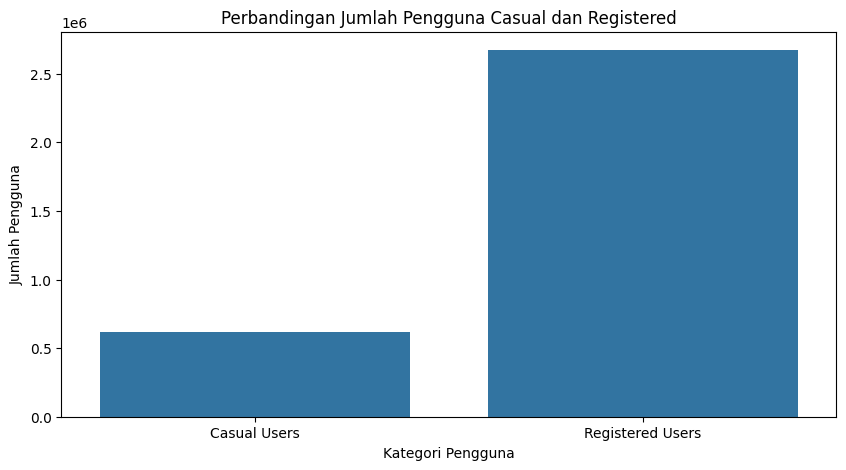

In [45]:
# Menghitung total pengguna casual dan registered
total_casual = hour_df['casual'].sum()
total_registered = hour_df['registered'].sum()

print(f"Total Casual Users: {total_casual}")
print(f"Total Registered Users: {total_registered}")

plt.figure(figsize=(10, 5))
sns.barplot(x=["Casual Users", "Registered Users"], y=[total_casual, total_registered])
plt.xlabel("Kategori Pengguna")
plt.ylabel("Jumlah Pengguna")
plt.title("Perbandingan Jumlah Pengguna Casual dan Registered")
plt.show()

Insight :
- Pengguna Registered Lebih Banyak: Dengan total pengguna registered mencapai lebih dari 2,6 juta, jelas bahwa segmen ini jauh lebih besar dibandingkan pengguna casual yang hanya sekitar 620 ribu. Ini menunjukkan bahwa banyak pengguna yang memilih untuk mendaftar dan menggunakan layanan secara teratur.
- Loyalitas Pengguna: Dominasi pengguna registered dapat diartikan sebagai tingkat loyalitas yang tinggi. Pengguna mungkin merasa lebih terikat dengan platform, mungkin karena manfaat tambahan yang didapatkan dari pendaftaran, seperti promosi, akses ke fitur eksklusif, atau penghematan biaya.
- Peluang untuk Meningkatkan Pengguna Casual: Meskipun jumlah pengguna casual lebih rendah, mereka masih merupakan segmen yang berpotensi untuk dikembangkan. Strategi pemasaran dan promosi yang ditargetkan dapat dirancang untuk meningkatkan konversi pengguna casual menjadi pengguna registered, sehingga meningkatkan basis pengguna secara keseluruhan.

In [46]:
df = day_df.copy()

## Visualization & Explanatory Analysis

# Pertanyaan 1 : Seberapa besar dampak kondisi cuaca terhadap jumlah peminjaman sepeda pada akhir pekan dalam dua tahun terakhir?

In [47]:
# Buat Kolom weather_group
def categorize_weather(condition):
    if condition == 1:
        return 'Cerah'
    elif condition == 2:
        return 'Mendung'
    elif condition == 3:
        return 'Hujan Ringan'
    else:
        return 'Cuaca Ekstrem'  # weathersit == 4

df['weather_group'] = df['weathersit'].apply(categorize_weather)

<ipython-input-48-a45d383c9a1e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=weekend_data['weather_group'], y=weekend_data['count'], palette='coolwarm')


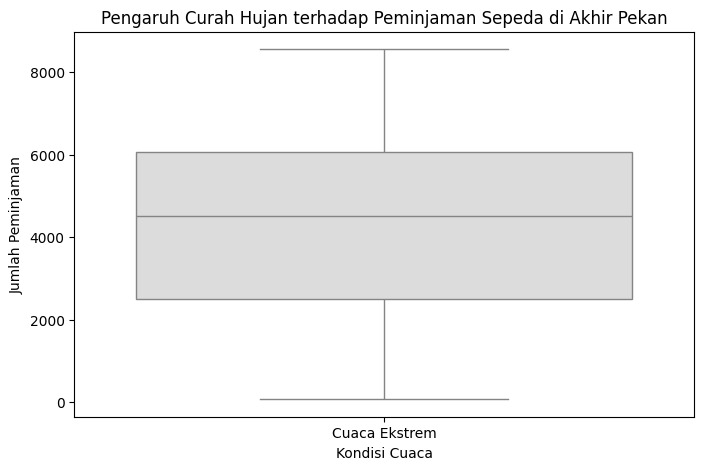

In [48]:
# Pegaruh cuaca terhadap peminjaman sepeda
weekend_data = df[df['weekday'].isin([6, 7])]
plt.figure(figsize=(8,5))
sns.boxplot(x=weekend_data['weather_group'], y=weekend_data['count'], palette='coolwarm')
plt.title('Pengaruh Curah Hujan terhadap Peminjaman Sepeda di Akhir Pekan')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()

- Cuaca Ekstrem Menurunkan Peminjaman :  Jumlah peminjaman sepeda berkurang drastis saat cuaca ekstrem dibandingkan kondisi cuaca lainnya.

- Variasi Peminjaman Saat Cuaca Ekstrem : Meskipun sebagian besar peminjaman rendah, ada beberapa kasus dengan jumlah peminjaman yang masih cukup tinggi.

- Cuaca sebagai Faktor Utama : Kondisi cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda di akhir pekan, sehingga perlu strategi operasional yang mempertimbangkan cuaca.

# Pertanyaan 2 : Bagaimana pola pertumbuhan jumlah peminjaman sepeda pada musim panas dibandingkan dengan musim lainnya?

In [49]:
# Membuat kolom season_group
def categorize_season(season):
    if season == 1:
        return 'Musim Semi'
    elif season == 2:
        return 'Musim Panas'
    elif season == 3:
        return 'Musim Gugur'
    else:
        return 'Musim Dingin'

df['season_group'] = df['season'].apply(categorize_season)

<ipython-input-50-5890310af320>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_group', y='count', data=season_avg, palette='viridis')


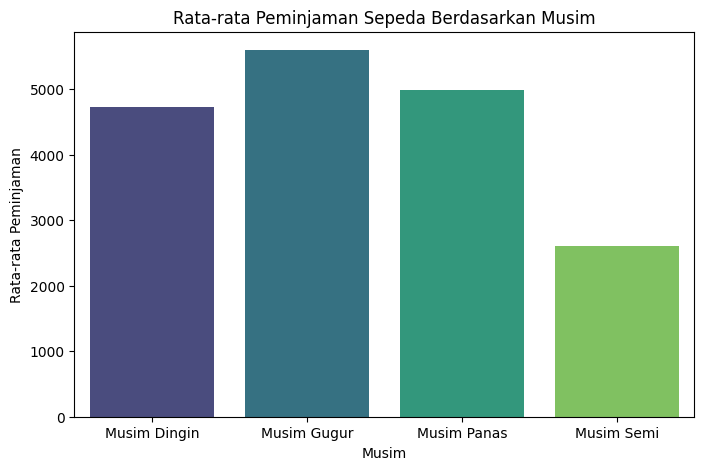

In [50]:
# Mengelomokan data peminjaman berdasarkan musim dan hitung rata-rata peminjaman
season_avg = df.groupby('season_group')['count'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='season_group', y='count', data=season_avg, palette='viridis')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Peminjaman')
plt.show()

- Musim Gugur Memiliki Peminjaman Tertinggi = Jumlah peminjaman sepeda tertinggi terjadi pada musim gugur, sedikit lebih tinggi dibandingkan musim panas.

- Musim Panas Tetap Tinggi tetapi di Bawah Musim Gugur = Peminjaman sepeda pada musim panas cukup tinggi, namun masih lebih rendah dibandingkan musim gugur, menunjukkan bahwa faktor seperti suhu atau liburan mungkin memengaruhi tren.

- Musim Semi Memiliki Peminjaman Terendah = Dibandingkan musim lainnya, musim semi memiliki rata-rata peminjaman sepeda yang paling rendah, kemungkinan karena faktor cuaca atau pola aktivitas pengguna.

# Pertanyaan 3 : Bagaimana perbedaan pola peminjaman sepeda antara pengguna casual dan registered pada hari kerja?

<ipython-input-51-1cc90741ee76>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='user_group', y='rental_count', data=weekday_data, palette='pastel')


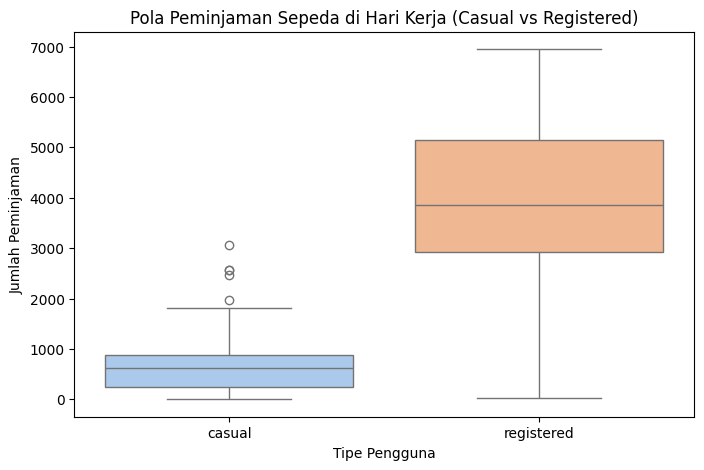

In [51]:
# Mengubah format data dari bentuk wide menjadi long
user_data = df.melt(id_vars=['weekday'], value_vars=['casual', 'registered'],
                     var_name='user_group', value_name='rental_count')

# Plot pola peminjaman sepeda di hari kerja
weekday_data = user_data[user_data['weekday'].isin([1, 2, 3, 4, 5])]

plt.figure(figsize=(8,5))
sns.boxplot(x='user_group', y='rental_count', data=weekday_data, palette='pastel')

plt.title('Pola Peminjaman Sepeda di Hari Kerja (Casual vs Registered)')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Jumlah Peminjaman')
plt.show()

- Pengguna Registered Mendominasi Peminjaman = Pengguna terdaftar (registered) secara signifikan lebih sering meminjam sepeda dibandingkan pengguna casual pada hari kerja.

- Variasi Peminjaman yang Lebih Stabil pada Registered = Distribusi peminjaman pengguna registered lebih luas dan memiliki median yang lebih tinggi, menunjukkan bahwa mereka menggunakan sepeda secara lebih konsisten, kemungkinan untuk perjalanan rutin seperti bekerja.

- Pengguna Casual Memiliki Peminjaman yang Lebih Rendah dan Bervariasi = Peminjaman oleh pengguna casual lebih rendah dan memiliki beberapa outlier, mengindikasikan bahwa mereka mungkin hanya meminjam dalam kondisi tertentu, seperti saat cuaca baik atau ada kesempatan khusus.

# **Analisis Lanjutan**

Manual Grouping digunakan untuk mengelompokkan pengguna berdasarkan tipe pengguna dan hari kerja

In [52]:
def user_category(row):
    if row['workingday'] == 1:
        return 'Hari Kerja'
    else:
        return 'Akhir Pekan'

df['user_group'] = df.apply(user_category, axis=1)

Binning digunakan untuk mengelompokkan jumlah peminjaman sepeda ke dalam kategori rendah, sedang, tinggi

In [53]:
# Menentukan batasan berdasarkan kuantil
bins = [df['count'].min(), df['count'].quantile(0.33), df['count'].quantile(0.66), df['count'].max()]
labels = ['Rendah', 'Sedang', 'Tinggi']
df['count_category'] = pd.cut(df['count'], bins=bins, labels=labels, include_lowest=True)

In [54]:
# Menampilkan hasil
df[['dateday', 'user_group', 'count', 'count_category']].head()

dateday   user_group  count count_category
0 2011-01-01  Akhir Pekan    985         Rendah
1 2011-01-02  Akhir Pekan    801         Rendah
2 2011-01-03   Hari Kerja   1349         Rendah
3 2011-01-04   Hari Kerja   1562         Rendah
4 2011-01-05   Hari Kerja   1600         Rendah

In [55]:
def season_cluster(row):
    if row['season'] == 1:
        return 'Musim Semi'
    elif row['season'] == 2:
        return 'Musim Panas'
    elif row['season'] == 3:
        return 'Musim Gugur'
    else:
        return 'Musim Dingin'

df['season_group'] = df.apply(season_cluster, axis=1)
print(df.columns)

Index(['dateday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'status', 'weather_group',
       'season_group', 'user_group', 'count_category'],
      dtype='object')


In [56]:
df = df.copy()
df['season_group'] = df['season'].map({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

In [57]:
# MemBuat weather_group
def weather_cluster(row):
    if row['weathersit'] == 1:
        return 'Cerah'
    elif row['weathersit'] == 2:
        return 'Berawan'
    elif row['weathersit'] == 3:
        return 'Hujan'
    else:
        return 'Cuaca Ekstrem'

df['weather_group'] = df.apply(weather_cluster, axis=1)
df[['dateday', 'user_group', 'count', 'count_category', 'season_group', 'weather_group']].head()

dateday   user_group  count count_category season_group  weather_group
0 2011-01-01  Akhir Pekan    985         Rendah   Musim Semi  Cuaca Ekstrem
1 2011-01-02  Akhir Pekan    801         Rendah   Musim Semi  Cuaca Ekstrem
2 2011-01-03   Hari Kerja   1349         Rendah   Musim Semi  Cuaca Ekstrem
3 2011-01-04   Hari Kerja   1562         Rendah   Musim Semi  Cuaca Ekstrem
4 2011-01-05   Hari Kerja   1600         Rendah   Musim Semi  Cuaca Ekstrem

In [58]:
# Clustering Berdasarkan Musim
def season_cluster(row):
    if row['season'] == 1:
        return 'Musim Semi'
    elif row['season'] == 2:
        return 'Musim Panas'
    elif row['season'] == 3:
        return 'Musim Gugur'
    else:
        return 'Musim Dingin'

df['season_group'] = df.apply(season_cluster, axis=1)
df[['dateday', 'user_group', 'count', 'count_category', 'season_group', 'weather_group']].head()

dateday   user_group  count count_category season_group  weather_group
0 2011-01-01  Akhir Pekan    985         Rendah   Musim Semi  Cuaca Ekstrem
1 2011-01-02  Akhir Pekan    801         Rendah   Musim Semi  Cuaca Ekstrem
2 2011-01-03   Hari Kerja   1349         Rendah   Musim Semi  Cuaca Ekstrem
3 2011-01-04   Hari Kerja   1562         Rendah   Musim Semi  Cuaca Ekstrem
4 2011-01-05   Hari Kerja   1600         Rendah   Musim Semi  Cuaca Ekstrem

**Analisis Trend Penggunaan Sepeda Harian dan Bulanan**

Tujuan: untuk melihat pola penggunaan sepeda setiap bulan untuk memahami musim mana yang ramai dan musim mana yang sepi.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


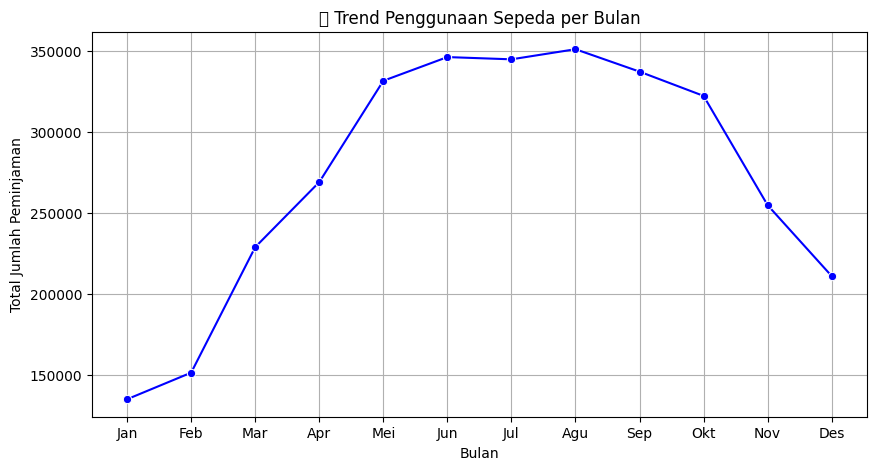

In [59]:
# Visualisasi tren peminjaman bulanan
df['dateday'] = pd.to_datetime(df['dateday'])
df['month'] = df['dateday'].dt.month
monthly_trend = df.groupby('month')['count'].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o', color='b')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.title('üìä Trend Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Jumlah Peminjaman')
plt.grid(True)
plt.show()

**Insight :**
- Puncak Penggunaan di Musim Panas: Dari visualisasi, terlihat bahwa penggunaan sepeda mencapai puncaknya pada bulan Juni hingga Agustus. Ini menunjukkan bahwa cuaca yang lebih baik selama musim panas mendorong peningkatan signifikan dalam peminjaman sepeda.
- Penurunan di Musim Dingin: Terlihat bahwa jumlah peminjaman sepeda menurun drastis pada bulan Desember dan Januari. Hal ini mungkin disebabkan oleh cuaca yang lebih dingin dan kurang nyaman untuk bersepeda, mengindikasikan perlunya strategi untuk menarik pengguna di musim dingin.

**Perbandingan Pengguna Casual vs Registered**

Tujuan: Menganalisis apakah pengguna terdaftar (registered) lebih sering menggunakan sepeda dibanding pengguna kasual (casual).

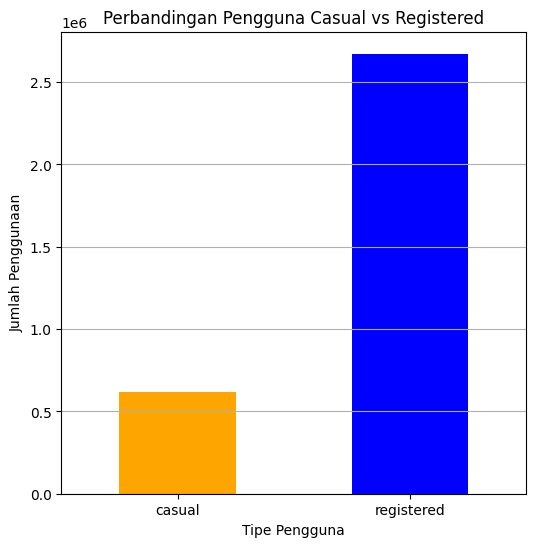

In [60]:
# Visualisasi perbandingan pengguna casual vs registered
user_comparison = df[['casual', 'registered']].sum()
plt.figure(figsize=(6, 6))
user_comparison.plot(kind='bar', color=['orange', 'blue'])
plt.title('Perbandingan Pengguna Casual vs Registered')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Jumlah Penggunaan')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**Insight :**
- Dominasi Pengguna Registered: Dari visualisasi, terlihat bahwa jumlah pengguna registered jauh lebih tinggi dibandingkan pengguna casual. Ini menunjukkan bahwa platform berhasil menarik dan mempertahankan pengguna terdaftar.
- Peluang untuk Meningkatkan Pengguna Casual: Meskipun jumlah pengguna casual lebih rendah, mereka tetap merupakan segmen yang signifikan. Strategi pemasaran atau promosi dapat difokuskan untuk meningkatkan konversi dari pengguna casual menjadi pengguna registered.
- Perbedaan Signifikan dalam Aktivitas: Jumlah penggunaan yang jauh lebih tinggi pada pengguna registered mengindikasikan bahwa mereka lebih aktif dalam menggunakan platform. Ini bisa menjadi indikator bahwa pengguna registered memiliki pengalaman yang lebih baik atau fitur yang lebih menarik dibandingkan pengguna casual.

**Bagaimana pengaruh curah hujan terhadap jumlah peminjaman sepeda pada akhir pekan dalam dua tahun terakhir**

Tujuan: Melihat bagaimana kondisi cuaca (cerah, berawan, hujan, ekstrem) mempengaruhi jumlah peminjaman sepeda.

<ipython-input-61-a8530ad62914>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_effect.index, y=weather_effect.values, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


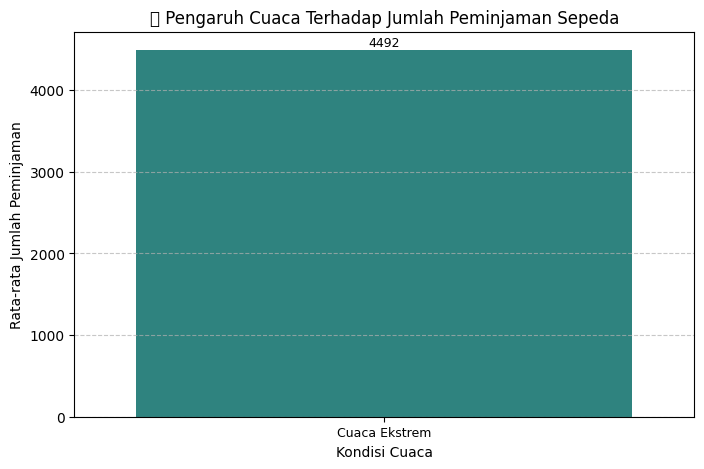

In [61]:
df = df.dropna(subset=['weather_group'])
weather_effect = df.groupby('weather_group')['count'].mean().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=weather_effect.index, y=weather_effect.values, palette='viridis')
plt.title('üå¶Ô∏è Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda', fontsize=12)
plt.xlabel('Kondisi Cuaca', fontsize=10)
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=10)
plt.xticks(rotation=0, fontsize=9)
for index, value in enumerate(weather_effect.values):
    plt.text(index, value + 50, f'{int(value)}', ha='center', fontsize=9, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight :**
- Pengaruh Cuaca Ekstrem: Dari visualisasi, terlihat bahwa kondisi cuaca ekstrem memiliki rata-rata jumlah peminjaman sepeda yang sangat tinggi. Ini menunjukkan bahwa meskipun cuaca tidak ideal, pengguna tetap memilih untuk meminjam sepeda, mungkin karena keperluan mendesak atau kurangnya alternatif transportasi.
- Kondisi Cuaca Lainnya: Rata-rata peminjaman sepeda di bawah kondisi cuaca lainnya menunjukkan variasi yang lebih rendah. Ini mengindikasikan bahwa cuaca yang lebih baik, seperti cerah atau berawan, mungkin tidak mendorong lonjakan penggunaan sepeda yang signifikan, sehingga pengguna cenderung memilih waktu dan kondisi yang lebih nyaman.

### **Conclusion**

**1. Dampak Kondisi Cuaca terhadap Peminjaman Sepeda** :
Dari analisis boxplot, terlihat bahwa kondisi cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda pada akhir pekan. Saat cuaca ekstrem (hujan deras atau badai), jumlah peminjaman cenderung jauh lebih rendah dibandingkan kondisi cuaca lainnya. Sementara itu, peminjaman lebih tinggi dan lebih stabil saat cuaca lebih baik (cerah atau mendung). Hal ini menunjukkan bahwa pengguna sepeda sangat dipengaruhi oleh kondisi cuaca saat merencanakan aktivitas bersepeda di akhir pekan.

**2. Pola Peminjaman Sepeda pada Musim Panas Dibandingkan dengan Musim Lainnya** :
Berdasarkan rata-rata peminjaman sepeda per musim, musim panas menunjukkan jumlah peminjaman yang tinggi, meskipun masih sedikit lebih rendah dibandingkan musim gugur yang memiliki peminjaman tertinggi. Sebaliknya, musim semi memiliki jumlah peminjaman terendah, kemungkinan karena kondisi cuaca yang kurang mendukung atau berkurangnya aktivitas luar ruangan. Pola ini mengindikasikan bahwa musim panas tetap menjadi salah satu periode dengan tingkat peminjaman tinggi, tetapi musim gugur tampaknya lebih optimal untuk penggunaan sepeda.

**3. Perbedaan Pola Peminjaman antara Pengguna Casual dan Registered di Hari Kerja** :
Dari boxplot perbandingan pengguna casual dan registered, terlihat bahwa pengguna registered jauh lebih sering meminjam sepeda dibandingkan pengguna casual pada hari kerja. Pengguna registered memiliki median peminjaman yang lebih tinggi dan distribusi yang lebih luas, menunjukkan bahwa mereka menggunakan sepeda secara lebih rutin dan konsisten, kemungkinan untuk keperluan komuter atau perjalanan sehari-hari. Sementara itu, pengguna casual menunjukkan jumlah peminjaman yang lebih rendah dan bervariasi, dengan beberapa outlier, yang menunjukkan bahwa mereka mungkin hanya meminjam sepeda dalam kondisi tertentu atau kesempatan khusus.

Secara keseluruhan, kondisi cuaca dan musim sangat mempengaruhi tingkat peminjaman sepeda, sementara tipe pengguna juga menentukan pola penggunaan, di mana pengguna registered lebih aktif menggunakan sepeda secara rutin dibandingkan pengguna casual, terutama di hari kerja.

# **Saran**




*   Strategi Peningkatan Pengguna casual
Mengingat pengguna registered jauh lebih banyak dibandingkan casual, perusahaan dapat mempertimbangkan untuk memberikan promosi khusus bagi pengguna kasual agar mereka lebih sering menggunakan layanan ini, misalnya melalui diskon akhir pekan atau paket berlangganan yang lebih fleksibel.
*   Penyesuaian Operasional Berdasarkan Musim
Mengingat tren peminjaman cenderung meningkat pada musim panas dan menurun pada musim dingin, perusahaan dapat menyesuaikan strategi operasionalnya. Misalnya, pada musim dingin, bisa disediakan insentif bagi pengguna atau meningkatkan layanan lain seperti sepeda listrik atau jalur sepeda yang lebih aman di musim dingin.